In [1]:
import pickle 
import numpy as np 
import pandas as pd
import networkx as nx
from tqdm import tqdm
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import community
import collections

from src.utils.data_utils import *
from src.utils.general_utils import *
from src.utils.mapping import *

In [2]:
movie_path = 'data/Movie.pkl'
actors_path = 'data/Actor.pkl'

with open(movie_path, 'rb') as file:
    Movie = pickle.load(file)
Movie = Movie.reset_index()
with open(actors_path, 'rb') as file:
    Actor = pickle.load(file)

C:\Users\Thibault Schiesser\AppData\Local\Temp\ipykernel_13648\2668311966.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  Movie = pickle.load(file)


In [3]:
a = create_actor_language_dataset(Movie, Actor, 10)

We lose 11.47% of the dataset of movies with this operation.


C:\Users\Thibault Schiesser\OneDrive\Bureau\MA3\CS-401 - Applied data analysis\ada-2024-project-importnumpyaspd\src\utils\general_utils.py:229: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total = total.applymap(lambda x: 1 if pd.notna(x) else 0)


In [4]:
b = create_cross_language(a)

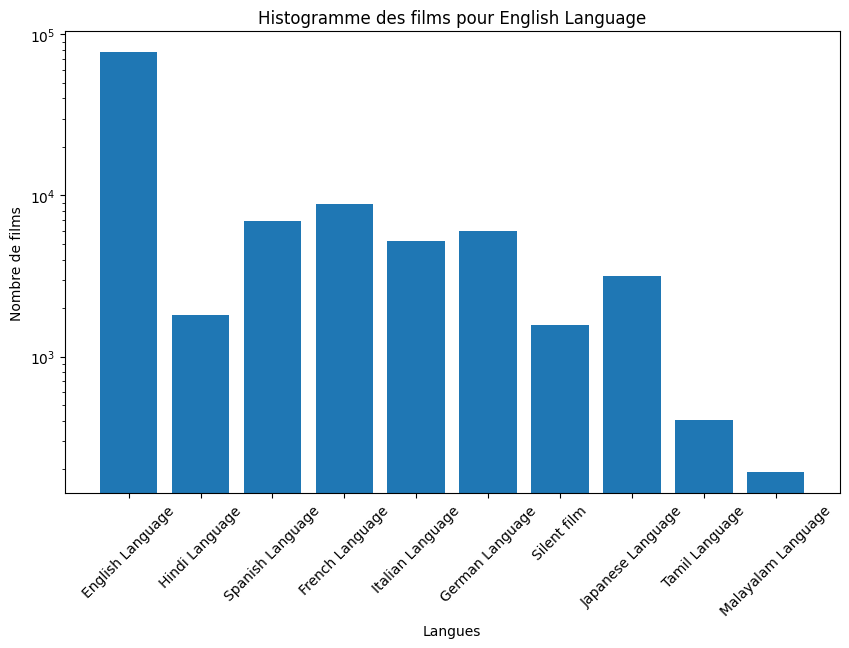

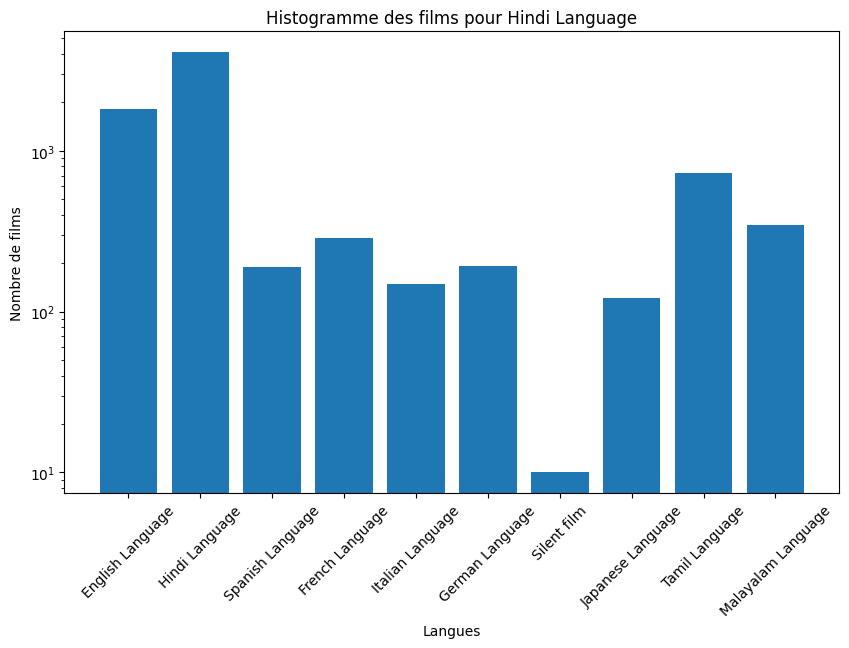

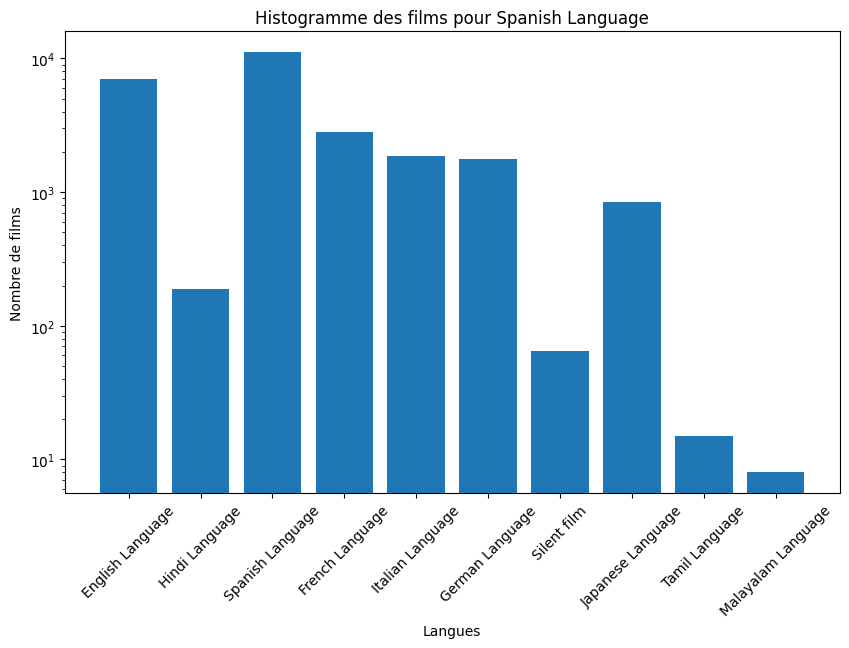

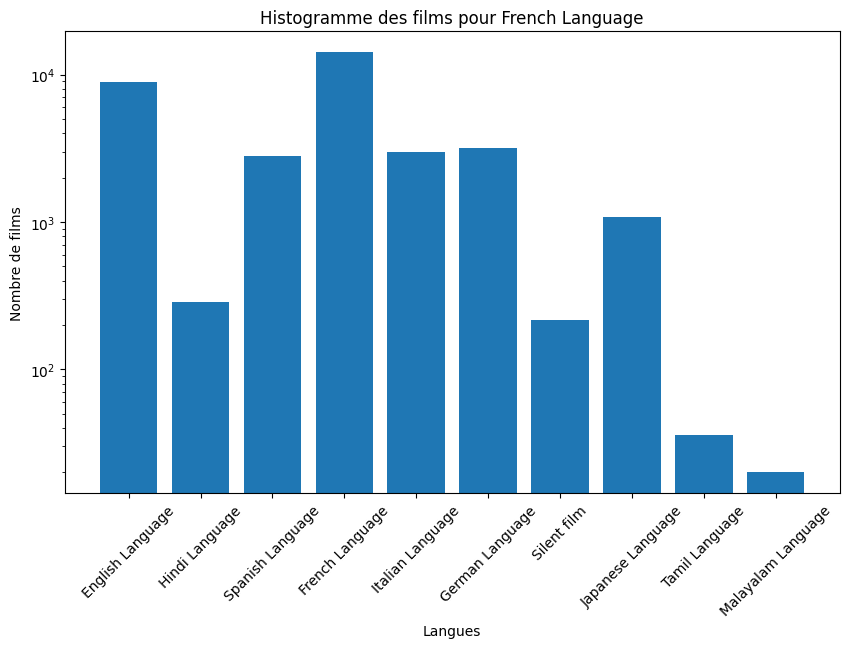

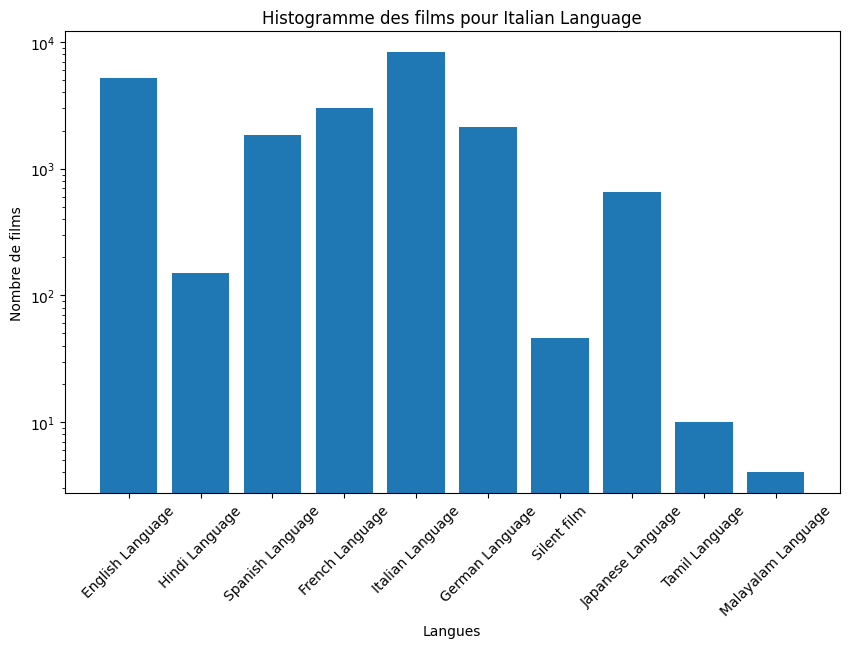

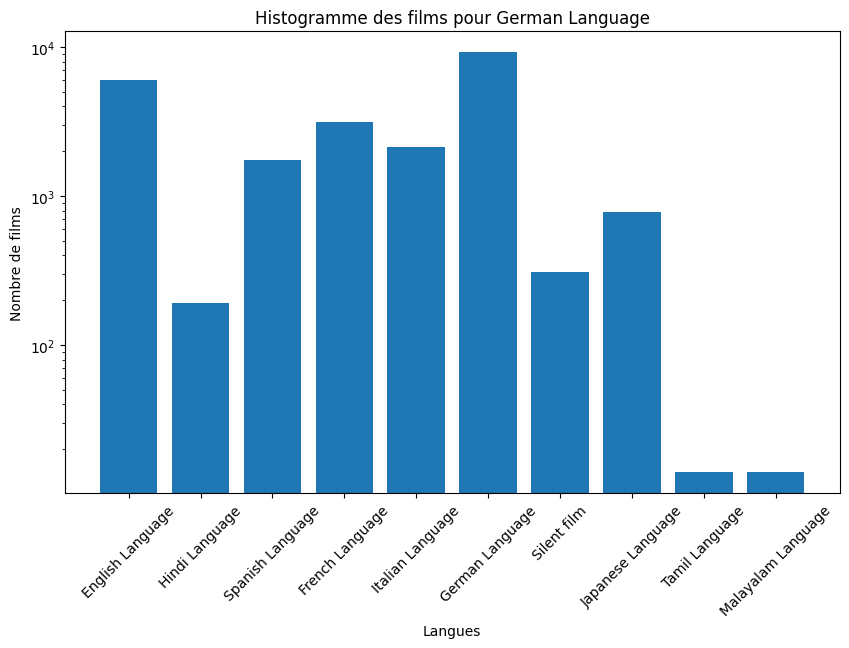

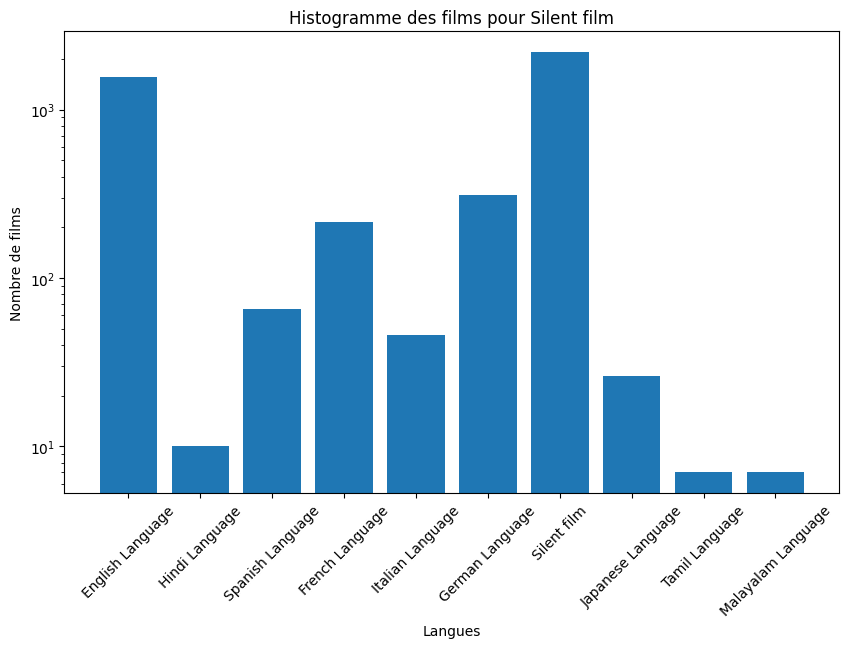

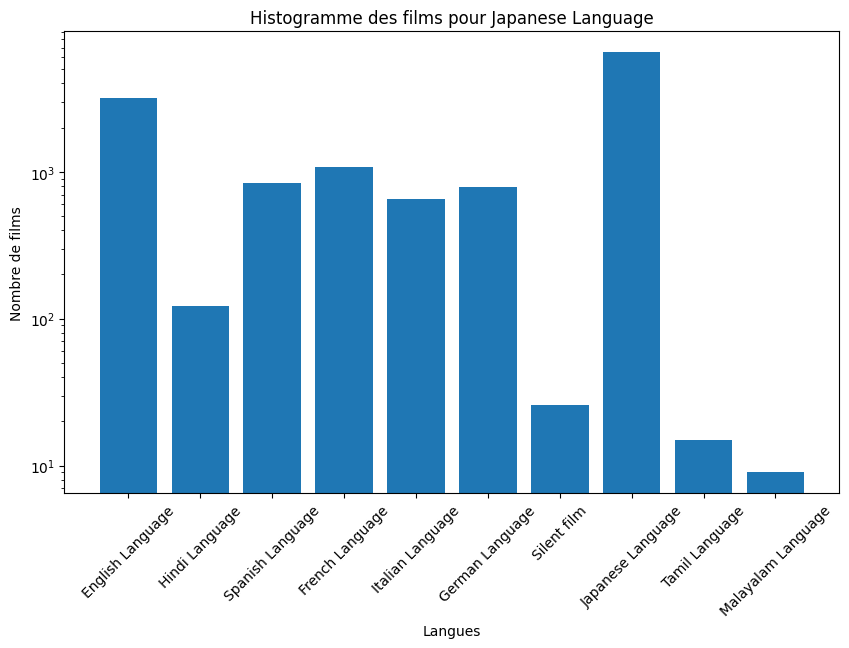

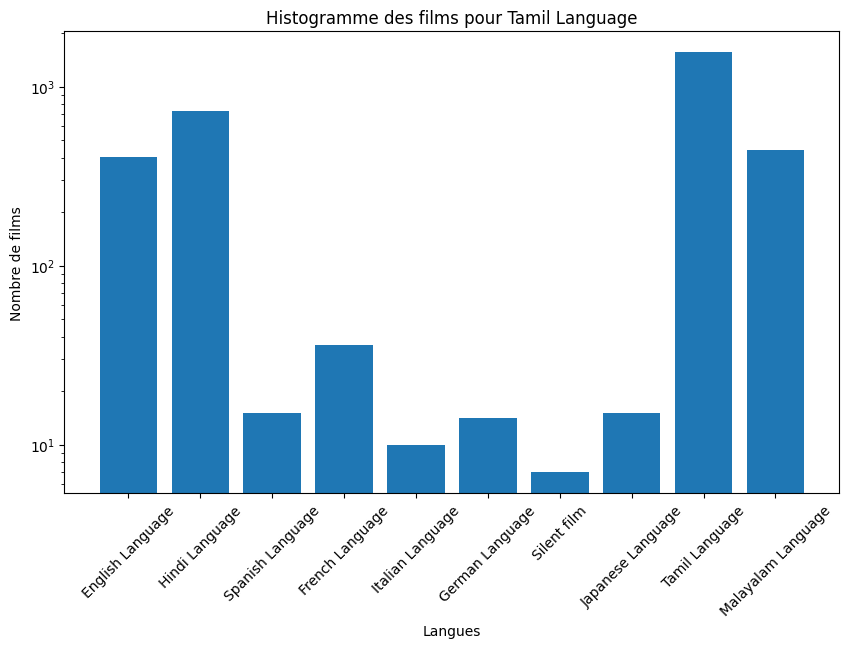

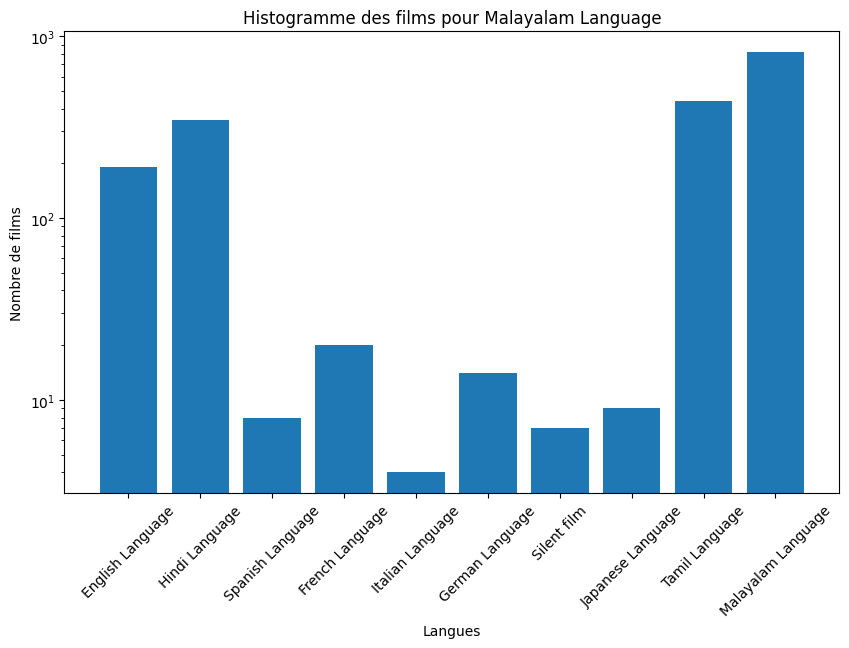

In [5]:
plot_language_histograms(b)

In [6]:
for key, value in b.items():
    print(f"Results for {key}:")
    print(value["sum"])
    print("\n")

Results for English Language:
Movie_languages
English Language      77257
Hindi Language         1818
Spanish Language       6966
French Language        8834
Italian Language       5222
German Language        5998
Silent film            1564
Japanese Language      3176
Tamil Language          406
Malayalam Language      191
Name: sum, dtype: int64


Results for Hindi Language:
Movie_languages
English Language      1818
Hindi Language        4093
Spanish Language       189
French Language        285
Italian Language       149
German Language        191
Silent film             10
Japanese Language      122
Tamil Language         726
Malayalam Language     347
Name: sum, dtype: int64


Results for Spanish Language:
Movie_languages
English Language       6966
Hindi Language          189
Spanish Language      11106
French Language        2797
Italian Language       1852
German Language        1757
Silent film              65
Japanese Language       845
Tamil Language           15
Malayalam 

quizz Jacky chan !!

In [10]:
abc = b['English Language'].T
abc["sum2"] = abc.sum(axis=1)
abc[abc["sum2"] == 9]

Movie_languages,English Language,Hindi Language,Spanish Language,French Language,Italian Language,German Language,Silent film,Japanese Language,Tamil Language,Malayalam Language,sum2
/m/012d40,1,1,1,1,1,1,0,1,1,1,9


In [4]:
Movie_wo_nan_language = Movie[Movie["Movie_languages"]!=""]
print(f"we lose {(Movie.shape[0]- Movie_wo_nan_language.shape[0])/Movie.shape[0] } with this operation.")

we lose 0.13579174994266244 with this operation.


In [5]:
Movie_wo_nan_language["Movie_languages"].value_counts()

Movie_languages
English Language                                                                              23722
Hindi Language                                                                                 2857
Spanish Language                                                                               2429
Italian Language                                                                               1644
French Language                                                                                1584
                                                                                              ...  
Japanese Language, Burmese Language, Thai Language                                                1
Slovak Language, Hungarian language                                                               1
Hainanese, Chinese, Hakka Language, Mandarin Chinese, Hokkien, Teochew, Standard Cantonese        1
Hindi Language, Chinese language, English Language                                  

keep 5 most representative language :

In [6]:
language_to_keep = Movie_wo_nan_language["Movie_languages"].value_counts().head(5).index

In [7]:
language_to_keep

Index(['English Language', 'Hindi Language', 'Spanish Language',
       'Italian Language', 'French Language'],
      dtype='object', name='Movie_languages')

In [8]:
Movie_languages = Movie[Movie.Movie_languages.isin(language_to_keep)]

In [9]:
Actor_movie = Actor["Freebase_movie_ID"]

In [10]:
Actor_movie.index = Actor.Freebase_actor_ID

In [11]:
dict_Actor_movie = Actor_movie.to_dict()

In [12]:
dict_movie_actor= {}
for key, values in dict_Actor_movie.items():
    for value in values:
        if value not in dict_movie_actor:
            dict_movie_actor[value] = []
        dict_movie_actor[value].append(key)

In [13]:
Movie = Movie.reset_index()
Movie["list_actor"] = Movie["Freebase_movie_ID"].map(dict_movie_actor)

In [14]:
print(Movie[Movie.list_actor.isna()].shape[0])
print(Movie[~Movie.list_actor.isna()].shape[0])
print(f"we lose {-Movie[Movie.list_actor.isna()].shape[0]+Movie[~Movie.list_actor.isna()].shape[0]} movies")
Movie = Movie[~Movie.list_actor.isna()]

10295
50747
we lose 40452 movies


In [15]:
Movie_English =  Movie[Movie.Movie_languages==language_to_keep[0]]
Movie_Hindi = Movie[Movie.Movie_languages==language_to_keep[1]]
Movie_Spanish = Movie[Movie.Movie_languages==language_to_keep[2]]
Movie_Italian = Movie[Movie.Movie_languages==language_to_keep[3]]
Movie_French = Movie[Movie.Movie_languages==language_to_keep[4]]

In [ ]:
movie_dict = {}
for language in language_to_keep:
    movie_dict[language] = Movie[Movie.Movie_languages == language]

In [16]:
Movie_English.shape

(21428, 29)

In [17]:
Movie_Hindi.shape

(2764, 29)

In [18]:
Movie_Spanish.shape

(1225, 29)

In [19]:
Movie_Italian.shape

(1180, 29)

In [20]:
Movie_French.shape

(1344, 29)

In [21]:
actor_list_french = actor_list_occurence(Movie_French)
actor_list_italian = actor_list_occurence(Movie_Italian)
actor_list_spanish = actor_list_occurence(Movie_Spanish)
actor_list_english = actor_list_occurence(Movie_English)
actor_list_hindi = actor_list_occurence(Movie_Hindi)

In [22]:
total = pd.concat([actor_list_french, actor_list_italian, actor_list_spanish, actor_list_english, actor_list_hindi], axis=1, join='outer')
total.columns = ['french', 'italian', 'spanish', 'english', 'hindi']

In [23]:
total = total.applymap(lambda x: 1 if pd.notna(x) else 0)

C:\Users\Thibault Schiesser\AppData\Local\Temp\ipykernel_23140\2056863235.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total = total.applymap(lambda x: 1 if pd.notna(x) else 0)


In [24]:
total

,french,italian,spanish,english,hindi
/m/03nrkh8,1,0,0,0,0
/m/03ns9y5,1,0,0,0,0
/m/0j638jf,1,0,0,0,0
/m/0n647jr,1,0,0,0,0
/m/03h1p0v,1,0,0,0,0
...,...,...,...,...,...
/m/0gm16q3,0,0,0,0,1
/m/0gm2pkl,0,0,0,0,1
/m/0h7r9ly,0,0,0,0,1
/m/027k3cy,0,0,0,0,1


In [25]:
total_copy = total.copy()
total_copyyyy = total.copy()

In [26]:
index = 0
filtered_column = total_copyyyy.iloc[:, index][total_copyyyy.iloc[:, index] != 0]
test = pd.DataFrame(np.zeros(filtered_column.shape))
test.index = total_copy.iloc[:, index][total_copyyyy.iloc[:, index] != 0].index

In [33]:
for j in total_copy.columns :
    if j != total_copy.columns[index]:
        test[j] = total_copy[total_copy.columns[index]]+total_copy[j]
test = test-1
test.replace(-1,0)

,0,italian,spanish,english,hindi
/m/03nrkh8,0.0,0,0,0,0
/m/03ns9y5,0.0,0,0,0,0
/m/0j638jf,0.0,0,0,0,0
/m/0n647jr,0.0,0,0,0,0
/m/03h1p0v,0.0,0,0,0,0
...,...,...,...,...,...
/m/0gfnrmc,0.0,0,0,0,0
/m/06qv4y,0.0,0,1,1,0
/m/0h4pgnx,0.0,0,0,0,0
/m/0h4pgpg,0.0,0,0,0,0


In [32]:
test

,0,italian,spanish,english,hindi
/m/03nrkh8,0.0,-1,-1,-1,-1
/m/03ns9y5,0.0,-1,-1,-1,-1
/m/0j638jf,0.0,-1,-1,-1,-1
/m/0n647jr,0.0,-1,-1,-1,-1
/m/03h1p0v,0.0,-1,-1,-1,-1
...,...,...,...,...,...
/m/0gfnrmc,0.0,-1,-1,-1,-1
/m/06qv4y,0.0,-1,-1,-1,-1
/m/0h4pgnx,0.0,-1,-1,-1,-1
/m/0h4pgpg,0.0,-1,-1,-1,-1


In [26]:
new = total.T

In [27]:
new.iloc[5:,:] = new.iloc[5:,:].applymap(lambda x: 0 if x == 1 else x)

C:\Users\Thibault Schiesser\AppData\Local\Temp\ipykernel_18372\1770717424.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new.iloc[5:,:] = new.iloc[5:,:].applymap(lambda x: 0 if x == 1 else x)


In [ ]:
nb_actor = new.shape[1]

In [28]:
new["sum"]=new.sum(axis=1)/nb_actor *100

In [29]:
new["sum"]

french              5484
italian             3654
spanish             4413
english            61992
hindi               2734
french_italian       658
french_spanish       210
french_english      1498
french_hindi          16
italian_spanish      298
italian_english     1468
italian_hindi          0
spanish_english      852
spanish_hindi          0
english_hindi        354
Name: sum, dtype: int64

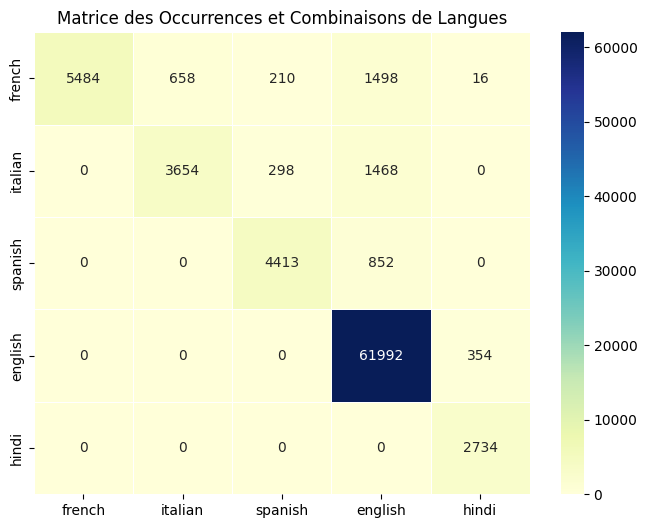

In [31]:
# Créer les données sous forme de dictionnaire
data = {
    'french': [5484],
    'italian': [3654],
    'spanish': [4413],
    'english': [61992],
    'hindi': [2734],
    'french_italian': [658],
    'french_spanish': [210],
    'french_english': [1498],
    'french_hindi': [16],
    'italian_spanish': [298],
    'italian_english': [1468],
    'italian_hindi': [0],
    'spanish_english': [852],
    'spanish_hindi': [0],
    'english_hindi': [354]
}

# Créer un DataFrame avec les données
df = pd.DataFrame(data)

# Extraire les langues
languages = ['french', 'italian', 'spanish', 'english', 'hindi']

# Créer une matrice vide de taille (5, 5) pour représenter les langues
matrix = pd.DataFrame(0, index=languages, columns=languages)

# Remplir la diagonale avec les valeurs associées à chaque langue
matrix.loc['french', 'french'] = 5484
matrix.loc['italian', 'italian'] = 3654
matrix.loc['spanish', 'spanish'] = 4413
matrix.loc['english', 'english'] = 61992
matrix.loc['hindi', 'hindi'] = 2734

# Remplir les valeurs hors diagonale avec les combinaisons
matrix.loc['french', 'italian'] = 658
matrix.loc['french', 'spanish'] = 210
matrix.loc['french', 'english'] = 1498
matrix.loc['french', 'hindi'] = 16
matrix.loc['italian', 'spanish'] = 298
matrix.loc['italian', 'english'] = 1468
matrix.loc['italian', 'hindi'] = 0
matrix.loc['spanish', 'english'] = 852
matrix.loc['spanish', 'hindi'] = 0
matrix.loc['english', 'hindi'] = 354

# Afficher la matrice avec Seaborn (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', linewidths=0.5, fmt="d", cbar=True)

# Ajouter un titre
plt.title("Matrice des Occurrences et Combinaisons de Langues")

# Afficher la figure
plt.show()

In [44]:
nb_actor = new.shape[1]

In [55]:
cooccur_matrix = new.dot(new.T)

In [56]:
cooccur_matrix

,french_italian,french_spanish,french_english,french_hindi,italian_spanish,italian_english,italian_hindi,spanish_english,spanish_hindi,english_hindi
french_italian,9796,6067,7296,5821,4237,5466,3991,1737,262,1491
french_spanish,6067,10107,6764,5597,4996,1653,486,5693,4526,1183
french_english,7296,6764,68974,6418,1594,63804,1248,63272,716,62926
french_hindi,5821,5597,6418,8234,434,1255,3071,1031,2847,3668
italian_spanish,4237,4996,1594,434,8365,4963,3803,5722,4562,1160
italian_english,5466,1653,63804,1255,4963,67114,4565,63301,752,62903
italian_hindi,3991,486,1248,3071,3803,4565,6388,1060,2883,3645
spanish_english,1737,5693,63272,1031,5722,63301,1060,67257,5016,62595
spanish_hindi,262,4526,716,2847,4562,752,2883,5016,7147,3337
english_hindi,1491,1183,62926,3668,1160,62903,3645,62595,3337,65080


<Axes: >

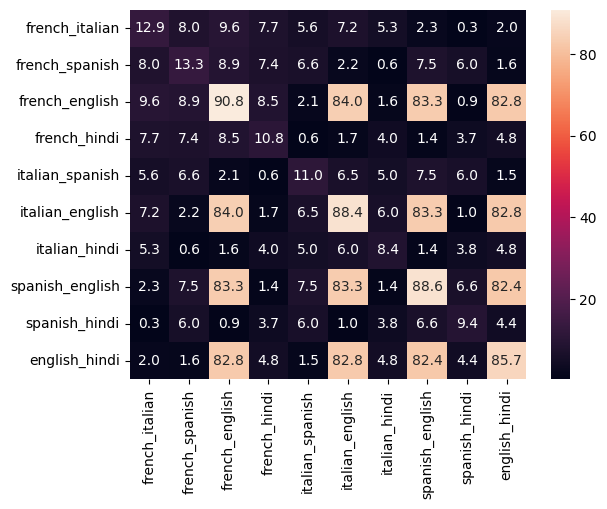

In [52]:
sns.heatmap(cooccur_matrix,annot=True, fmt=".1f")

------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
start_time = time.time()
G = create_actor_network(Actor, Movie_English, min_movies=40, min_releasedate=3000)
print("Created graph with actors:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
end_time = time.time()
print(f"time to compute: {end_time - start_time:.1f} seconds")

In [ ]:
sp = nx.spring_layout(G, k=0.2, seed=42)
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=5, width=0.05)
plt.title("Actor network clustered", fontsize=15)
plt.show()

In [ ]:
start_time = time.time()
G = create_actor_network(Actor, Movie_French, min_movies=40, min_releasedate=3000)
print("Created graph with actors:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
end_time = time.time()
print(f"time to compute: {end_time - start_time:.1f} seconds")
sp = nx.spring_layout(G, k=0.2, seed=42)
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=5, width=0.05)
plt.title("Actor network clustered", fontsize=15)
plt.show()

In [ ]:
from src.utils.mapping_indian import ethnicity_is_indian

In [ ]:
Actor['continent'] = Actor['ethnicity'].map(ethnicity_to_continent)

In [ ]:
Actor['Indian'] = Actor['ethnicity'].map(ethnicity_is_indian)

In [ ]:
start_time = time.time()
G = create_actor_network(Actor, Movie, min_movies=40, min_releasedate=3000)
print("Created graph with actors:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
end_time = time.time()
print(f"time to compute: {end_time - start_time:.1f} seconds")

Now that the network is created, we plot it to visualize it and to get an intuition before making the clusters

In [ ]:
sp = nx.spring_layout(G, k=0.2, seed=42)
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=5, width=0.05)
plt.title("Actor network clustered", fontsize=15)
plt.show()

We can see different groups already, but we will use the Louvain algorithm to divide these clusters mathematically and plot them. 

In [ ]:
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
counter=collections.Counter(values)

In [ ]:
sp = nx.spring_layout(G, k=0.2, seed=42)
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=5, node_color=values, width=0.05)
# plt.axes('off')
plt.title("Actor network clustered with louvain method", fontsize=15)
plt.show()
end_time = time.time()
print(f"time to compute: {end_time - start_time:.1f} seconds")

This is the most time-consuming part of the analysis, and the (relatively short) time of 45 seconds for the actors with more than 20 films, we show that with a bigger group of actors, the analysis is possible.

Now we analyse the clusters in-depth, to extract metrics.

In [ ]:
partition = pd.Series(partition)
partition.name = "cluster_id"

# Merge the partition with the Actor dataset
actors_clustered = pd.merge(Actor, partition, right_index=True, left_on="Freebase_actor_ID")

# Find the three largest clusters
largest_clusters = partition.value_counts().head(3).index

# Loop through the largest clusters and plot
for cluster_id in largest_clusters:
    example = actors_clustered[actors_clustered["cluster_id"] == cluster_id]
    example_counts = example["ethnicity"].value_counts().reset_index()
    example_counts.columns = ["ethnicity", "Count"]

    # Filter for ethnicities with a count > 5
    example_counts = example_counts[example_counts["Count"] > 5]

    # Plot the ethnicity distribution for the cluster
    sns.barplot(data=example_counts, x="ethnicity", y="Count")
    plt.title(f"Ethnicity in cluster {cluster_id}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [ ]:
partition = pd.Series(partition)
partition.name = "cluster_id"
actors_clustered = pd.merge(Actor,partition, right_index=True, left_on= "Freebase_actor_ID")
actors_clustered.cluster_id.value_counts()
print("Number of clusters :", len(counter))
print("Clusters ordered by size :", counter)

Only the relevant cluster with more than 100 actors inside will be kept and will be analysed in the final project. To show that analysis is doable, one example is shown below.

In [ ]:
partition_series = pd.Series(partition)
partition_series.name = "cluster_id"
cluster_sizes = partition_series.value_counts()
index_to_keep = cluster_sizes[cluster_sizes > 100].index  # Clusters avec plus de 100 acteurs

actors_clustered = pd.merge(Actor, partition_series, right_index=True, left_on="Freebase_actor_ID")

# only keeping the pertinent cluster
filtered_data = actors_clustered[actors_clustered["cluster_id"].isin(index_to_keep)]

continent_counts = (
    filtered_data.groupby(["cluster_id", "continent"])
    .size()
    .reset_index(name="Count")
)
# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(
    data=continent_counts,
    x="cluster_id",
    y="Count",
    hue="continent",
    dodge=True
)
plt.title("Ethnicities in Clusters with More Than 100 Actors", fontsize=15)
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
# Le problème avec ces ethnicité en plus qu'il n'y a qu'une petite proportion qui est donnée c'est que beaucoup on peut pas trop les situer sur une carte, en particulier 'White people' et 'Jewish people'
actors_with_White_people = Actor[Actor['ethnicity'] == 'White people']

count_actors_with_nan_continent = actors_with_White_people.shape[0]
print(f"Nombre d'acteurs l'ethnicité 'White people) : {count_actors_with_nan_continent}")
actors_with_nan_continent = Actor[
    (Actor['ethnicity'].notnull()) & 
    (Actor['continent'] == 'NaN') & 
    (Actor['ethnicity'] != 'White people') & 
    (Actor['ethnicity'] != 'Jewish people')
]

actors_with_Jewish_people = Actor[Actor['ethnicity'] == 'Jewish people']

count_actors_with_nan_continent = actors_with_Jewish_people.shape[0]
print(f"Nombre d'acteurs l'ethnicité 'Jewish people) : {count_actors_with_nan_continent}")
actors_with_nan_continent = Actor[
    (Actor['ethnicity'].notnull()) & 
    (Actor['continent'] == 'NaN') & 
    (Actor['ethnicity'] != 'White people') & 
    (Actor['ethnicity'] != 'Jewish people')
]


count_actors_with_nan_continent = actors_with_nan_continent.shape[0]
print(f"Nombre d'acteurs avec une ethnicité mais un continent égal à 'NaN' (excluant 'White people' et 'Jewish people') : {count_actors_with_nan_continent}")


# J'essaye de faire un truc plus specifique aux "Indian People"

In [ ]:
Indian_Actor = Actor[Actor['Indian']==1]

In [ ]:
Indian_Actor.shape

In [ ]:
start_time = time.time()
H = create_actor_network(Indian_Actor, Movie, min_movies=2, min_releasedate=3000)
print("Created graph with actors:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
end_time = time.time()
print(f"time to compute: {end_time - start_time:.1f} seconds")

In [ ]:
sp = nx.spring_layout(H, k=0.3, seed=42)
plt.figure(figsize=(15, 15))
nx.draw_networkx(H, pos=sp, with_labels=False, node_size=5, width=0.05)
plt.title("Indian Actor network clustered", fontsize=15)
plt.show()

In [ ]:
partition2 = community.best_partition(H)
values = [partition2.get(node) for node in H.nodes()]
counter=collections.Counter(values)

In [ ]:
sp = nx.spring_layout(H, k=0.3, seed=42)
plt.figure(figsize=(15, 15))
nx.draw_networkx(H, pos=sp, with_labels=False, node_size=10, node_color=values, width=0.02)
# plt.axes('off')
plt.title("Indian Actor network clustered with louvain method", fontsize=15)
plt.show()
end_time = time.time()
print(f"time to compute: {end_time - start_time:.1f} seconds")

In [ ]:
partition2 = pd.Series(partition2)
partition2.name = "cluster_id"

# Merge the partition with the Actor dataset
actors_clustered = pd.merge(Indian_Actor, partition2, right_index=True, left_on="Freebase_actor_ID")

# Find the three largest clusters
largest_clusters = partition2.value_counts().head(3).index

# Loop through the largest clusters and plot
for cluster_id in largest_clusters:
    example = actors_clustered[actors_clustered["cluster_id"] == cluster_id]
    example_counts = example["ethnicity"].value_counts().reset_index()
    example_counts.columns = ["ethnicity", "Count"]

    # Filter for ethnicities with a count > 5
    example_counts = example_counts[example_counts["Count"] > 5]

    # Plot the ethnicity distribution for the cluster
    sns.barplot(data=example_counts, x="ethnicity", y="Count")
    plt.title(f"Ethnicity in cluster {cluster_id}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()